In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Problem definition
Trying to predict the math score,reading score and writing score of different students based on the various features given.

## Data
The data can be downloaded from the given kaggle link on student performance dataset

https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

## Evaluation
* Mean Absolute Error (MAE)
* Mean Squared Error(MSE)
* R^2 Score

In [3]:
df=pd.read_csv("data/StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

### Check for Duplicates and missing values

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing or duplicated values.

In [11]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [14]:
df["math score"].value_counts()

math score
65    36
62    35
69    32
59    32
73    27
      ..
24     1
26     1
19     1
23     1
8      1
Name: count, Length: 81, dtype: int64

In [15]:
df["reading score"].value_counts()

reading score
72    34
74    33
64    32
73    30
67    30
      ..
32     1
26     1
28     1
23     1
40     1
Name: count, Length: 72, dtype: int64

In [16]:
df["writing score"].value_counts()

writing score
74    35
70    33
68    31
73    28
62    27
      ..
19     1
35     1
15     1
30     1
23     1
Name: count, Length: 77, dtype: int64

In [18]:
df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


## Perform EDA and visualize the data

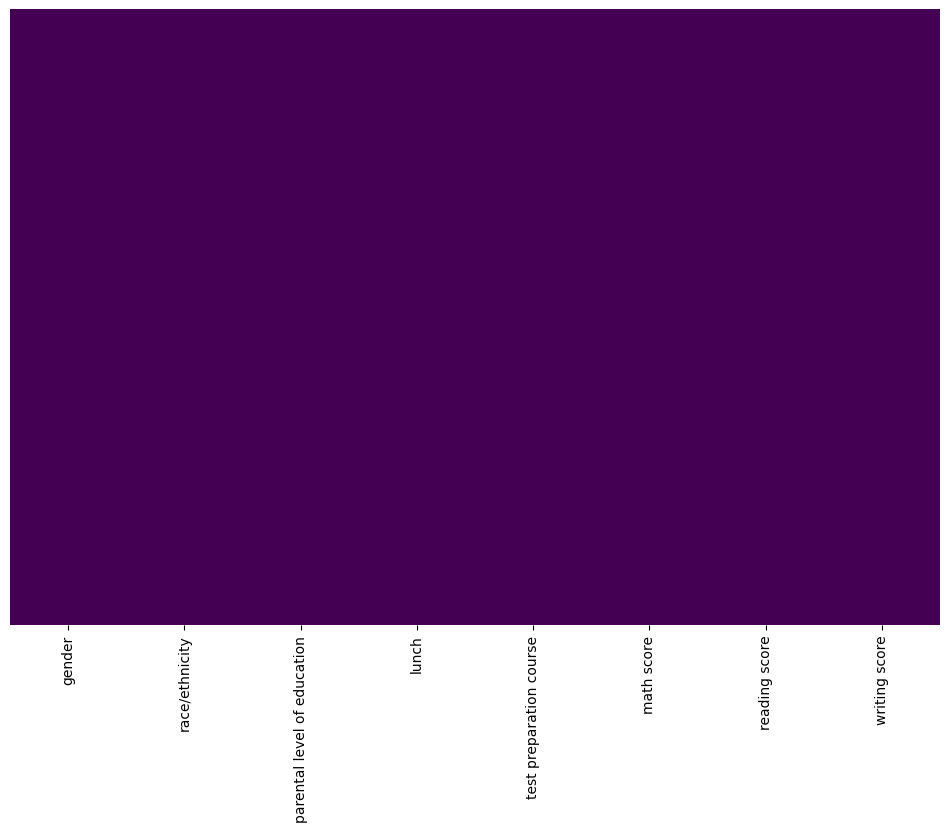

In [36]:
fig,ax=plt.subplots(figsize=(12,8))
ax=sns.heatmap(df.isnull(),
               yticklabels=False,
              cmap='viridis',
              cbar=False)

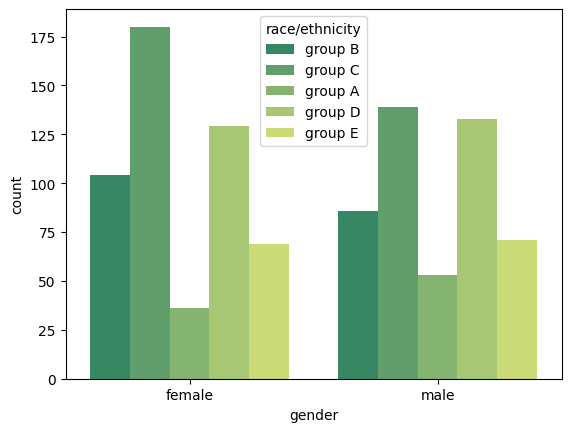

In [37]:
sns.countplot(data=df,x="gender",hue="race/ethnicity",palette="summer");

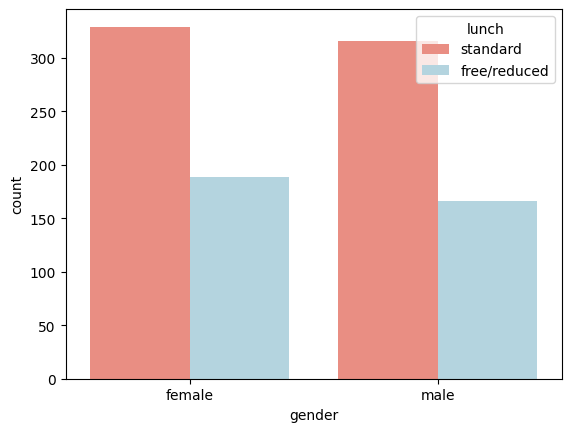

In [38]:
#Let's check the relation between the genders and the lunch they consume
sns.countplot(data=df,x="gender",hue="lunch",palette=["salmon","lightblue"]);

In [39]:
df["test preparation course"].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

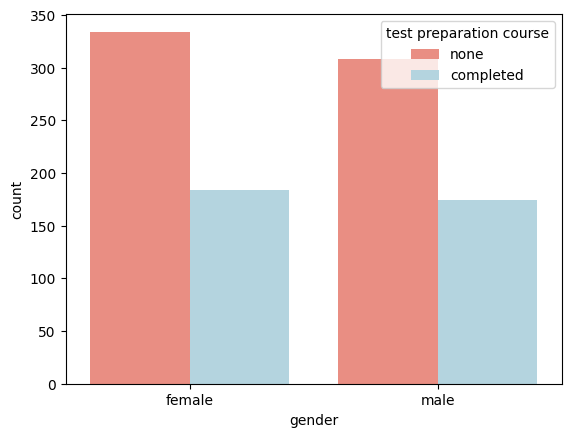

In [40]:
sns.countplot(data=df,x="gender",hue="test preparation course",palette=["salmon","lightblue"]);

So the majority of the both the genders didn't do any type test preparation course and the lesser propotion of students actually completed it.

So now let's see how test preparation course affects the `math score`,`reading score`,`writing score`.

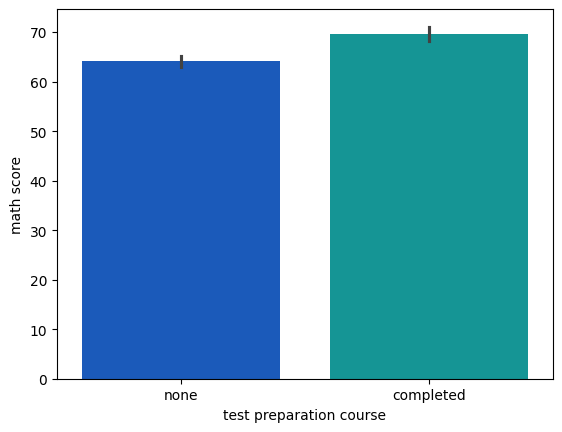

In [41]:
sns.barplot(data=df,x="test preparation course",y="math score",hue="test preparation course",palette="winter");

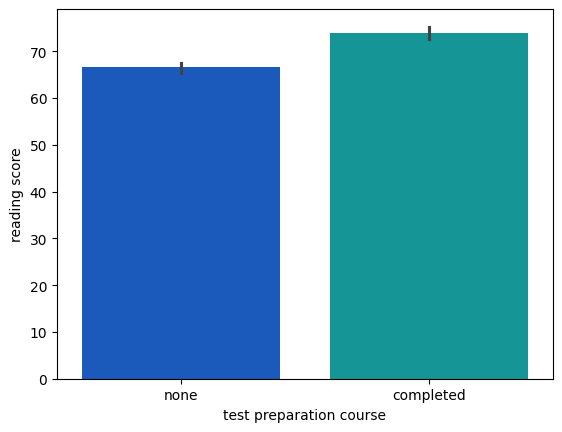

In [42]:
sns.barplot(data=df,x="test preparation course",y="reading score",hue="test preparation course",palette="winter");

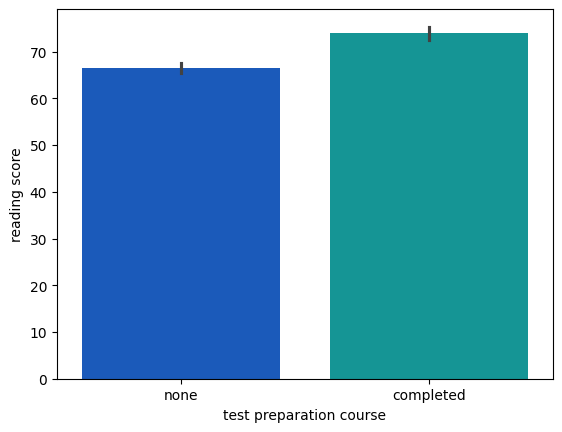

In [43]:
sns.barplot(data=df,x="test preparation course",y="reading score",hue="test preparation course",palette="winter");

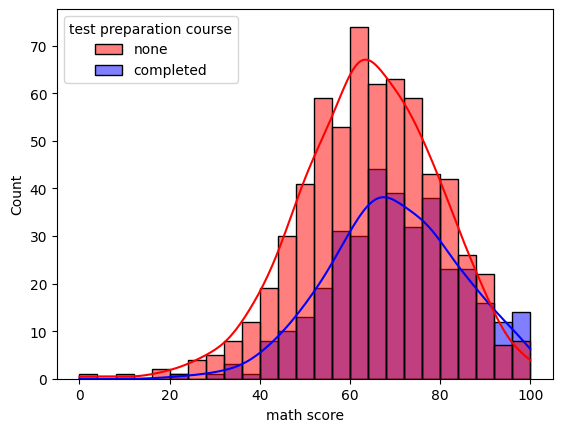

In [44]:
sns.histplot(data=df,x="math score",hue="test preparation course",kde=True,palette={"none":"red","completed":"blue"});

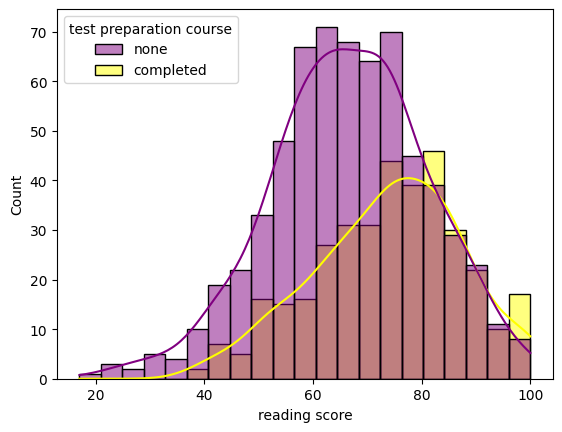

In [45]:
sns.histplot(data=df,x="reading score",hue="test preparation course",kde=True,palette={"none":"purple","completed":"yellow"});

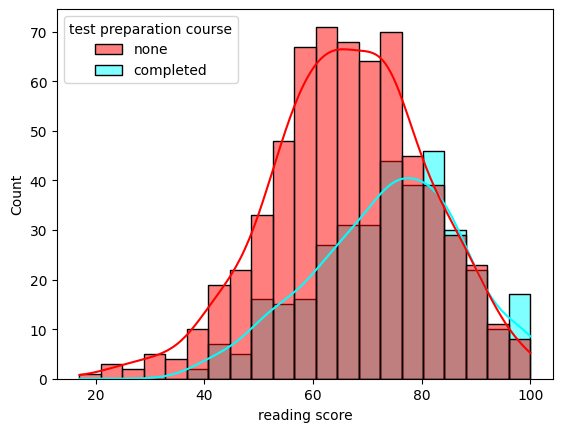

In [46]:
sns.histplot(data=df,x="reading score",hue="test preparation course",kde=True,palette={"none":"red","completed":"cyan"});

So we can draw 2 conclusions from all these visualizations-
* The students who completed the test preparation course scored more than those who didn't.
* The majority of the marks ranges between >55 to <=80.

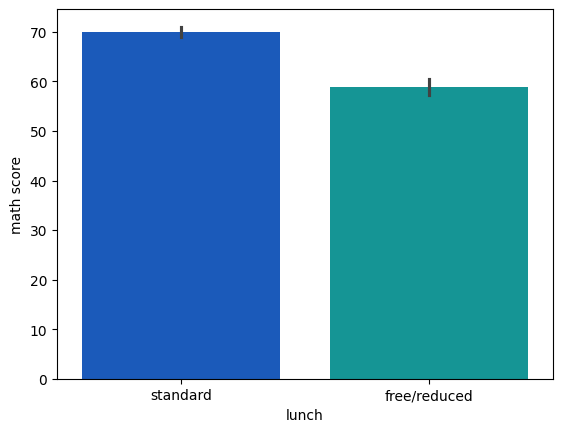

In [47]:
sns.barplot(data=df,x="lunch",y="math score",hue="lunch",palette="winter");

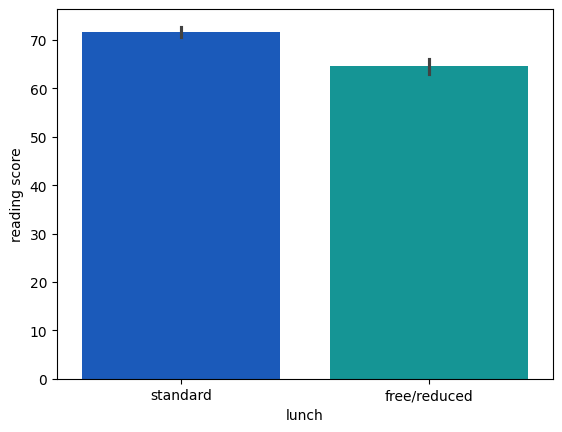

In [48]:
sns.barplot(data=df,x="lunch",y="reading score",hue="lunch",palette="winter");

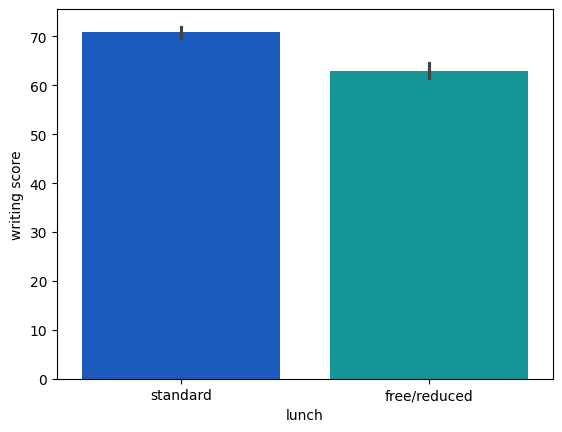

In [49]:
sns.barplot(data=df,x="lunch",y="writing score",hue="lunch",palette="winter");

So we can see an interesting relation here where students who consume more standard lunch scores more than those who consume free/reduced lunch.

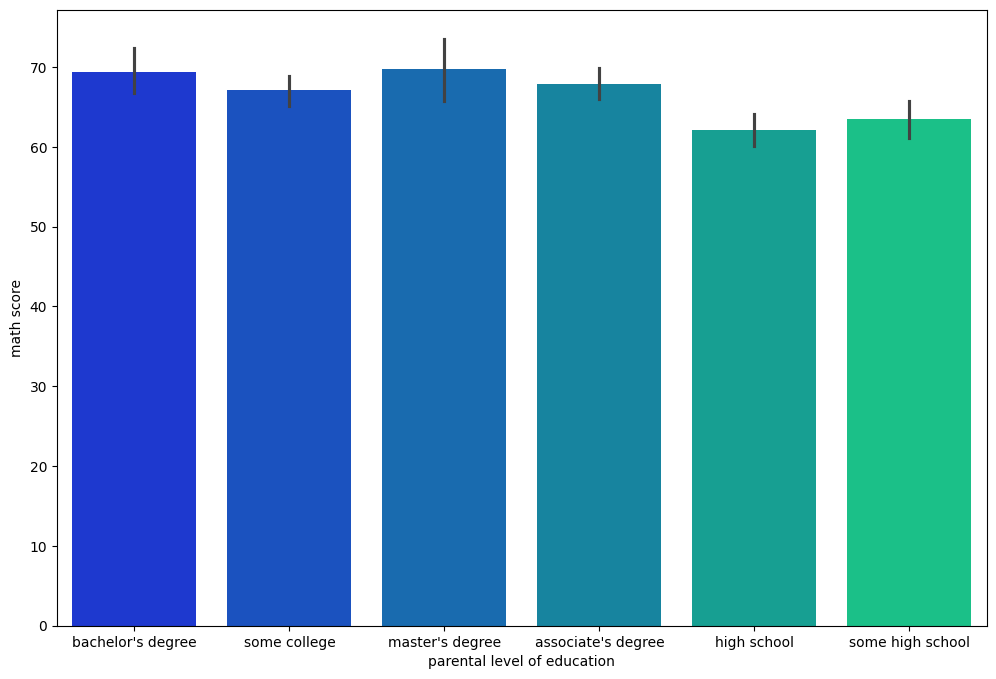

In [50]:
fig,ax=plt.subplots(figsize=(12,8))
ax=sns.barplot(data=df,x="parental level of education",y="math score",hue="parental level of education",palette="winter");

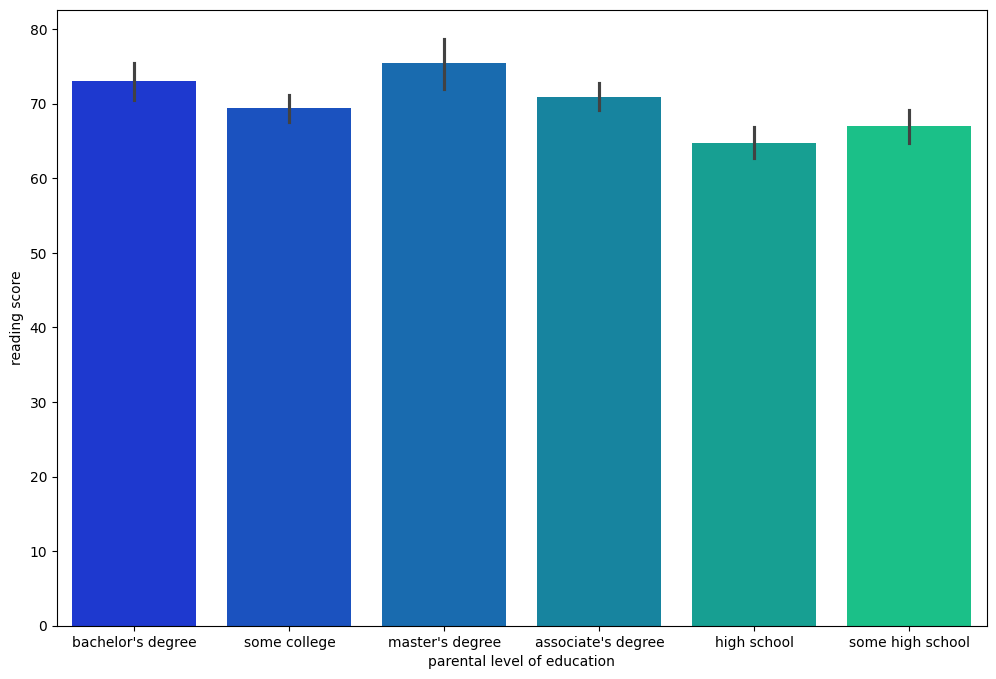

In [51]:
fig,ax=plt.subplots(figsize=(12,8))
ax=sns.barplot(data=df,x="parental level of education",y="reading score",hue="parental level of education",palette="winter");

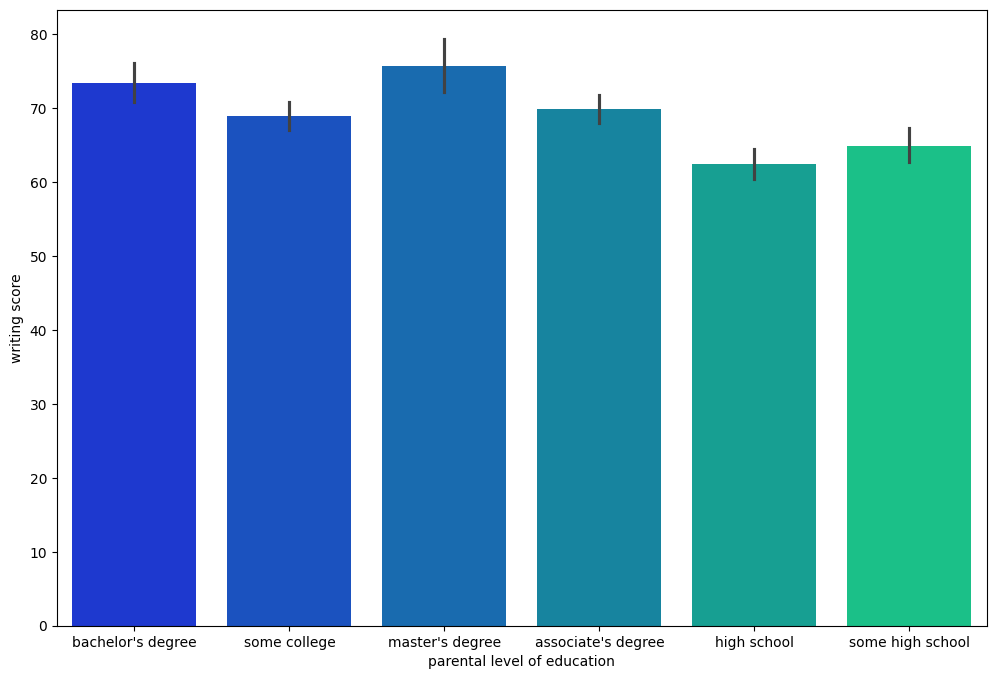

In [52]:
fig,ax=plt.subplots(figsize=(12,8))
ax=sns.barplot(data=df,x="parental level of education",y="writing score",hue="parental level of education",palette="winter");

In [53]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


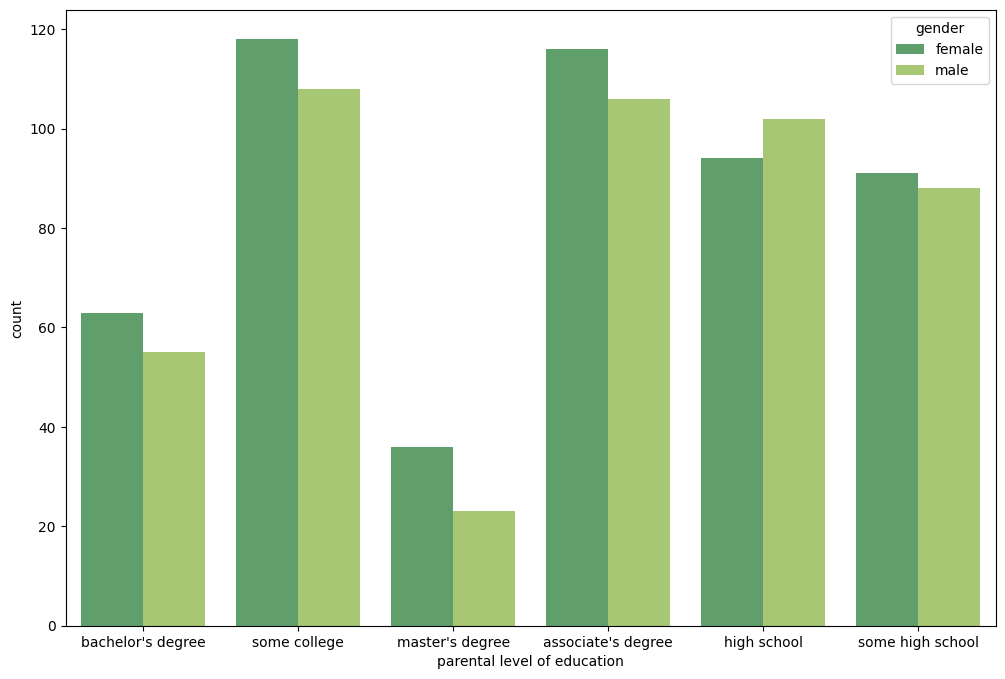

In [54]:
fig,ax=plt.subplots(figsize=(12,8))
ax=sns.countplot(data=df,x="parental level of education",hue="gender",palette="summer")

So the majority parental level of education are either passed out from `some college` or has `associate's degree` and the a very majority propotion of parent have `master's degree`.

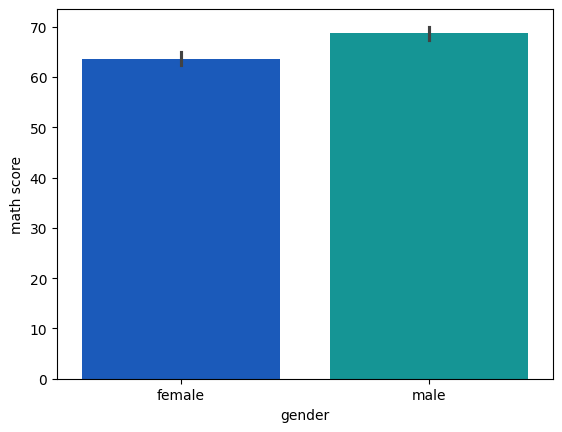

In [55]:
sns.barplot(data=df,x="gender",y="math score",hue="gender",palette="winter");

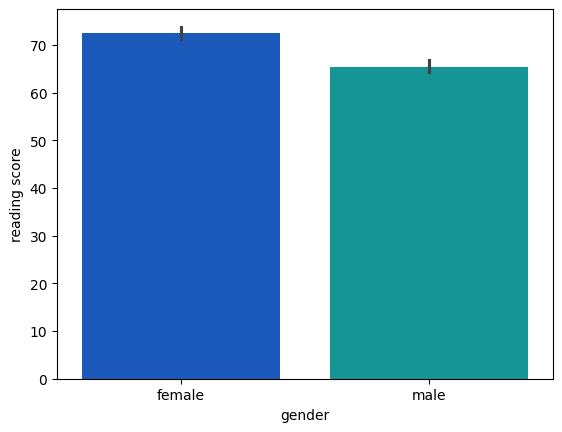

In [56]:
sns.barplot(data=df,x="gender",y="reading score",hue="gender",palette="winter");

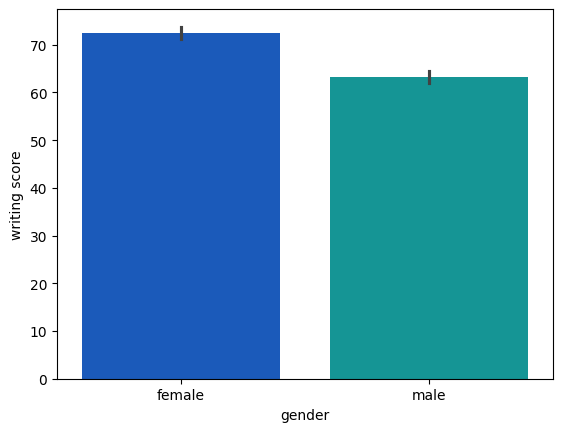

In [57]:
sns.barplot(data=df,x="gender",y="writing score",hue="gender",palette="winter");

So from these we can say two things-

* Female performs better for both reading score and wrting score.
* Male performs better for both math score.

## Performing a little feature engineering

In [58]:
total_value=df['math score']+df['reading score']+df['writing score']
df['total score']=total_value
average_value=total_value/3
df['average score']=average_value
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


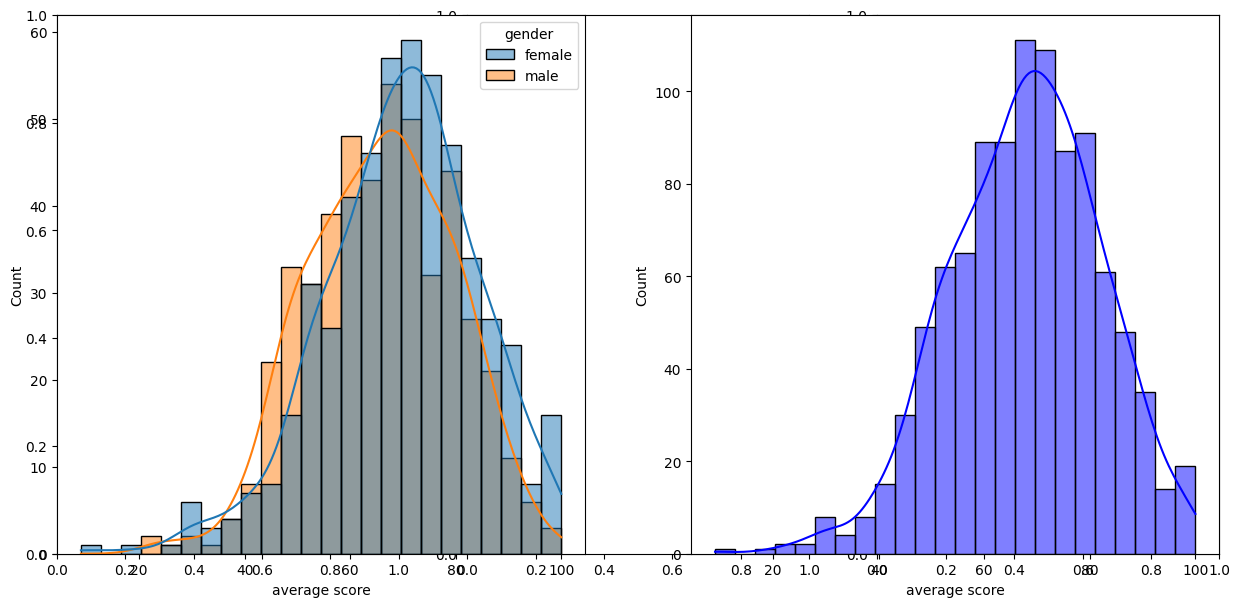

In [65]:
fig,ax=plt.subplots(1,3,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="average score",kde=True,hue="gender")
plt.subplot(122)
sns.histplot(data=df,x="average score",kde=True,color="blue");
plt.show()

Insights-
* Female generally perform better than male in scoring marks 